Census data is a 2D, each city has its own row number, change column number for city

1: San Francisco

2: Boston

3: Portland

4: Philadelphia

5: Seattle

Simply run all cells for the income distribution graph for the selected city

In [9]:
city_num = 1

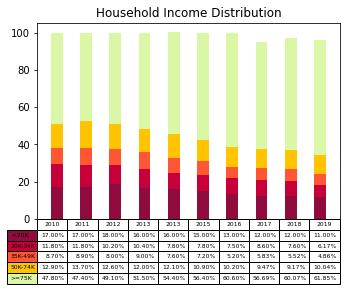

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# simply run the file, changing columns depending on what bar chart you want to show up

# read dataset, these are the file locations, so change these depending on your own path
df_10 = pd.read_csv("./data/d2_housingpercent2010.csv")
df_11 = pd.read_csv("./data/d2_housingpercent2011.csv")
df_12 = pd.read_csv("./data/d2_housingpercent2012.csv")
df_13 = pd.read_csv("./data/d2_housingpercent2013.csv")
df_14 = pd.read_csv("./data/d2_housingpercent2014.csv")
df_15 = pd.read_csv("./data/d2_housingpercent2015.csv")
df_16 = pd.read_csv("./data/d2_housingpercent2016.csv")
df_17 = pd.read_csv("./data/d2_housingpercent2017.csv")
df_18 = pd.read_csv("./data/d2_housingpercent2018.csv")
df_19 = pd.read_csv("./data/d2_housingpercent2019.csv")

dfs1 = [df_10, df_11, df_12, df_13, df_14, df_15, df_16]
dfs2 = [df_17, df_18, df_19]

inc_lessthan20 = []
inc_20to34 = []
inc_35to49 = []
inc_50to74 = []
inc_75plus = []

for df in dfs1:
    inc_lessthan20.append(float(df['S2503_C01_002E'][city_num]) + float(df['S2503_C01_003E'][city_num]) + \
        float(df['S2503_C01_004E'][city_num]) + float(df['S2503_C01_005E'][city_num]))
    inc_20to34.append((float(df['S2503_C01_006E'][city_num]) + float(df['S2503_C01_007E'][city_num])))
    inc_35to49.append(float(df['S2503_C01_008E'][city_num]))
    inc_50to74.append(float(df['S2503_C01_009E'][city_num]))
    inc_75plus.append(float(df['S2503_C01_010E'][city_num]) + float(df['S2503_C01_011E'][city_num]) + \
        float(df['S2503_C01_012E'][city_num]))
        
for df in dfs2:
    total = float(df['S2503_C01_001E'][city_num])
    running = float(df['S2503_C01_002E'][city_num]) + float(df['S2503_C01_003E'][city_num]) + \
        float(df['S2503_C01_004E'][city_num]) + float(df['S2503_C01_005E'][city_num])
    inc_lessthan20.append((running / total) * 100)
    inc_20to34.append((float(df['S2503_C01_006E'][city_num]) + float(df['S2503_C01_007E'][city_num]))/ total * 100)
    inc_35to49.append(float(df['S2503_C01_008E'][city_num])/ total * 100)
    inc_50to74.append(float(df['S2503_C01_009E'][city_num])/ total * 100)
    running = float(df['S2503_C01_010E'][city_num]) + float(df['S2503_C01_011E'][2]) + \
        float(df['S2503_C01_012E'][city_num])
    inc_75plus.append((running / total) * 100)
    
# organizing column and row names
data = [inc_lessthan20, inc_20to34, inc_35to49, inc_50to74, inc_75plus]
columns = ('2010', '2011', '2012', '2013', '2013', '2015', '2016', '2017', '2018', '2019')
rows = [' <20K', '20K-34K', '35K-49K', '50K-74K', '>=75K']

# Get some pastel shades for the colors
colors = ['#DAF7A6', '#FFC300', '#FF5733', '#C70039',  '#900C3F']
n_rows = len(data)
colors.reverse()

# formatting bar chart
index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

correction = [[0]*10]
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset += data[row]
    cell_text.append([int(x) for x in y_offset])
    cell_text[-1] = np.subtract(cell_text[-1], correction[-1])
    cell_text[-1] = ['%.2f' % x + '%' for x in cell_text[-1]]
    correction.append(list(y_offset))
# Reverse colors and text labels to display the last value at the top.


# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.xticks([])
# change title depending on which city you are currently displaying
plt.title('Household Income Distribution')

plt.show()